In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
from scipy import signal
#np.set_printoptions(threshold=np.nan) #print the whole arrray


In [20]:
t_inter = 200
n_samp_cos = 10
freq_samp = 1.0/((t_inter*1e-6))
freq_cos = 1.0/((t_inter*1e-6)*n_samp_cos)
print('cosine freq =', freq_cos, 'Hz')
print('sampling freq =', freq_samp, 'Hz')

cosine freq = 500.0 Hz
sampling freq = 5000.0 Hz


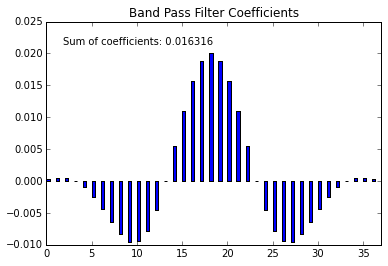

In [21]:
bp_coef = [ 0.000313, 0.000472, 0.000426, -0.000000, -0.000941, 
-0.002438, -0.004382, -0.006499, -0.008370, -0.009499, -0.009417, -0.007804, -0.004587, 0.000000, 0.005424, 0.010927, 0.015665, 0.018868, 0.020000, 0.018868, 
0.015665, 0.010927, 0.005424, 0.000000, -0.004587, 
-0.007804, -0.009417, -0.009499, -0.008370, -0.006499, 
-0.004382, -0.002438, -0.000941, -0.000000, 0.000426, 0.000472, 0.000313] 
#if len(bp_coef) != len(lp_coef):
  #  print('LOW PASS & BAND PASS FILTERS ARE NOT THE SAME LENGTH')
# plot filter coefficients
n_coef = len(bp_coef)
buf = np.zeros(n_coef)
ind = np.arange(n_coef)
fig, ax = plt.subplots()
ax.bar(ind, bp_coef, 0.35)
ax.set_xlim(0,37)
temptext = 'Sum of coefficients: {}'.format(np.sum(bp_coef))
ax.text(0.05, 0.9, temptext, transform = ax.transAxes)
ax.set_title('Band Pass Filter Coefficients');

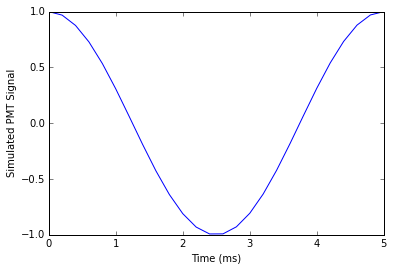

In [22]:
n_total_samples = 1001
time_interrupts = np.linspace(0, n_total_samples*t_inter*1e-3, num=n_total_samples)
test_signal = np.zeros(n_total_samples)
for i in range (n_total_samples):
    test_signal = (np.cos(2*np.pi*time_interrupts*i/freq_samp))

fig, ax = plt.subplots()
ax.plot(time_interrupts, test_signal)
#ax.set_ylim(-2,2)
ax.set_xlim(0,5)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Simulated PMT Signal');

In [23]:
test_signal

array([ 1.        ,  0.96852063,  0.87606441, ...,  0.96845803,
        0.99999997,  0.96858316])

In [24]:
def fir_basic(new_value, h, buf):
    '''Calculate FIR filtered value given filter coefficients, h, and delay line, buf
    
       inputs:
           new_value - latest sample
           h - array of filter coefficients
           buf - array containing previous sample values. Should be equal in length to h
       returns:
           new filtered value'''
    num_coef = len(h)
    buf[0] = new_value
    accum = 0
    for i in range(1, num_coef, 1):
        accum += h[i] * buf[i]
    # shift values to right in z buffer
    for i in range(num_coef-2, -1, -1):
        buf[i+1] = buf[i]
    #print(z, '\n', h)
    return accum

def zero_buf(buf):
    buf = 0.0

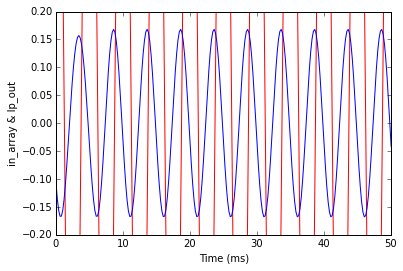

In [33]:
in_array = np.copy(test_signal)
#in_array += 3000
n_pts = len(in_array)
bp_out = np.zeros(n_pts)
zero_buf(buf) 
for i in range(n_pts):
    bp_out[i] = fir_basic(in_array[i], bp_coef,buf)

fig, ax = plt.subplots()
ax.set_xlim(0,50)
ax.set_ylim(-.20, .20)
ax.plot(time_interrupts, in_array, 'r')
ax.plot(time_interrupts, bp_out)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('in_array & lp_out');

In [26]:
bp_out


array([ 0.        ,  0.000472  ,  0.00088314, ...,  0.01110174,
       -0.0310408 , -0.07122906])

In [27]:
## TODO  Now test it with the teensy code 
## Write the teensy out put here
import serial
import time

In [28]:
teensy = serial.Serial("/dev/ttyACM1", 115200)



In [47]:
#In this for loop you have to mess with float and int in front of temp.strip  Put int first then run.  
#You'll get an error, But
# then if you put float then it work

data_temp = []
for i in range(1001):
    temp = teensy.readline()
    data_temp.append(float (temp.strip()))
    time.sleep(0.01)
print(data_temp)

[-0.16627, -0.15492, -0.13378, -0.10437, -0.06878, -0.02951, 0.0108, 0.04952, 0.08432, 0.11331, 0.13512, 0.14891, 0.15438, 0.15161, 0.14102, 0.12325, 0.09915, 0.06973, 0.03623, 0.00012, -0.03684, -0.07268, -0.10524, -0.13237, -0.15208, -0.16275, -0.16335, -0.15351, -0.13367, -0.10501, -0.06935, -0.02906, 0.01321, 0.05468, 0.09273, 0.12487, 0.14966, 0.16463, 0.16868, 0.1612, 0.14242, 0.11349, 0.07652, 0.03441, -0.00936, -0.05115, -0.08756, -0.11588, -0.13438, -0.14253, -0.14088, -0.1309, -0.11455, -0.09388, -0.07068, -0.04619, -0.02111, 0.00431, 0.03001, 0.05579, 0.08106, 0.10467, 0.12497, 0.13996, 0.14765, 0.14642, 0.13534, 0.11443, 0.08471, 0.0481, 0.00723, -0.03486, -0.07516, -0.11095, -0.139, -0.15815, -0.16711, -0.16527, -0.1528, -0.13065, -0.10047, -0.06448, -0.02524, 0.01455, 0.05234, 0.08592, 0.11355, 0.13404, 0.14674, 0.15146, 0.14835, 0.13779, 0.12034, 0.09671, 0.06779, 0.0347, -0.00114, -0.03799, -0.0738, -0.10635, -0.13339, -0.15285, -0.1631, -0.1631, -0.15256, -0.132, -0.10

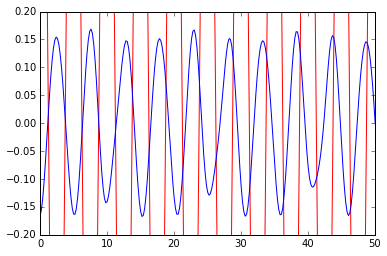

In [48]:
fig, ax = plt.subplots()
ax.set_xlim(0,50)
ax.set_ylim(-.20, .20)
ax.plot(time_interrupts, in_array, 'r')
ax.plot(time_interrupts, data_temp)

In [44]:
len(time_interrupts)

1001